In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hackerearth-employee-burnout-challenge/test.csv
/kaggle/input/hackerearth-employee-burnout-challenge/sample_submission.csv
/kaggle/input/hackerearth-employee-burnout-challenge/train.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train= pd.read_csv('../input/hackerearth-employee-burnout-challenge/train.csv', index_col='Employee ID')
test=pd.read_csv('../input/hackerearth-employee-burnout-challenge/test.csv', index_col='Employee ID')
train.head(10)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Employee ID,,,,,,,,
fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
fffe3300350037003500,2008-11-26,Male,Product,Yes,2.0,4.0,3.6,0.29
fffe33003300340039003100,2008-01-02,Female,Service,No,3.0,6.0,7.9,0.62
fffe32003600320037003400,2008-10-31,Female,Service,Yes,2.0,4.0,4.4,0.33
fffe32003200300034003700,2008-12-27,Female,Service,No,3.0,6.0,NaN,0.56


In [4]:
test.head(10)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
Employee ID,,,,,,,
fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4
fffe3600390032003200,2008-09-19,Male,Product,No,3.0,5.0,6.5
fffe3600370032003200,2008-01-16,Female,Service,Yes,2.0,3.0,4.7
fffe32003900390030003000,2008-02-10,Male,Service,No,2.0,5.0,8.5
fffe3100370031003000,2008-08-10,Male,Product,Yes,2.0,5.0,7.6


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22750 entries, fffe32003000360033003200 to fffe3400350031003800
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date of Joining       22750 non-null  object 
 1   Gender                22750 non-null  object 
 2   Company Type          22750 non-null  object 
 3   WFH Setup Available   22750 non-null  object 
 4   Designation           22750 non-null  float64
 5   Resource Allocation   21369 non-null  float64
 6   Mental Fatigue Score  20633 non-null  float64
 7   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.6+ MB


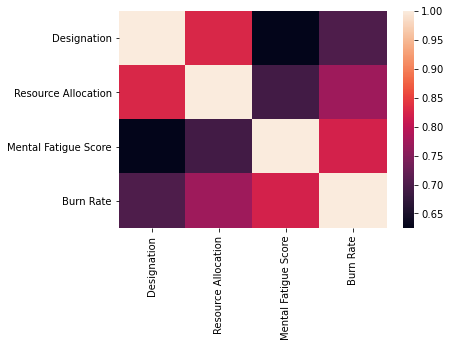

In [6]:
train.isnull().sum()
train= train.fillna(method='bfill', axis=0).fillna(0)
import seaborn as sns
sns.heatmap(train.corr())

In [7]:
train['WFH Setup Available']=train['WFH Setup Available'].replace({"Yes": "1.0","No":"0.0"})
train['Gender']=train['Gender'].replace({"Female": "1.0","Male":"0.0"})
train['Company Type']=train['Company Type'].replace({"Service": "1.0","Product":"0.0"})
train

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Employee ID,,,,,,,,
fffe32003000360033003200,2008-09-30,1.0,1.0,0.0,2.0,3.0,3.8,0.16
fffe3700360033003500,2008-11-30,0.0,1.0,1.0,1.0,2.0,5.0,0.36
fffe31003300320037003900,2008-03-10,1.0,0.0,1.0,2.0,1.0,5.8,0.49
fffe32003400380032003900,2008-11-03,0.0,1.0,1.0,1.0,1.0,2.6,0.20
fffe31003900340031003600,2008-07-24,1.0,1.0,0.0,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...
fffe31003500370039003100,2008-12-30,1.0,1.0,0.0,1.0,3.0,6.7,0.41
fffe33003000350031003800,2008-01-19,1.0,0.0,1.0,3.0,6.0,6.7,0.59
fffe390032003000,2008-11-05,0.0,1.0,1.0,3.0,7.0,5.9,0.72


In [8]:
#train['Gender']= pd.to_numeric(train['Gender'], downcast="float64")
#train['WFH Setup Available']= pd.to_numeric(train['WFH Setup Available'], downcast="float64")
#train['Company Type']= pd.to_numeric(train['Company Type'], downcast="float64")
train['Gender']= train['Gender'].astype(float)
train['WFH Setup Available']= train['WFH Setup Available'].astype(float)
train['Company Type']= train['Company Type'].astype(float)
train

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Employee ID,,,,,,,,
fffe32003000360033003200,2008-09-30,1.0,1.0,0.0,2.0,3.0,3.8,0.16
fffe3700360033003500,2008-11-30,0.0,1.0,1.0,1.0,2.0,5.0,0.36
fffe31003300320037003900,2008-03-10,1.0,0.0,1.0,2.0,1.0,5.8,0.49
fffe32003400380032003900,2008-11-03,0.0,1.0,1.0,1.0,1.0,2.6,0.20
fffe31003900340031003600,2008-07-24,1.0,1.0,0.0,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...
fffe31003500370039003100,2008-12-30,1.0,1.0,0.0,1.0,3.0,6.7,0.41
fffe33003000350031003800,2008-01-19,1.0,0.0,1.0,3.0,6.0,6.7,0.59
fffe390032003000,2008-11-05,0.0,1.0,1.0,3.0,7.0,5.9,0.72


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22750 entries, fffe32003000360033003200 to fffe3400350031003800
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date of Joining       22750 non-null  object 
 1   Gender                22750 non-null  float64
 2   Company Type          22750 non-null  float64
 3   WFH Setup Available   22750 non-null  float64
 4   Designation           22750 non-null  float64
 5   Resource Allocation   22750 non-null  float64
 6   Mental Fatigue Score  22750 non-null  float64
 7   Burn Rate             22750 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.6+ MB


In [10]:
test['WFH Setup Available']=test['WFH Setup Available'].replace({"Yes": "1.0","No":"0.0"})
test['Gender']=test['Gender'].replace({"Female": "1.0","Male":"0.0"})
test['Company Type']=test['Company Type'].replace({"Service": "1.0","Product":"0.0"})
test

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
Employee ID,,,,,,,
fffe31003300390039003000,2008-12-10,1.0,1.0,0.0,2.0,5.0,7.7
fffe31003300310037003800,2008-08-14,1.0,0.0,1.0,1.0,2.0,5.2
fffe33003400380035003900,2008-11-13,0.0,0.0,1.0,1.0,3.0,5.9
fffe3100370039003200,2008-02-07,1.0,1.0,0.0,3.0,6.0,4.6
fffe32003600390036003700,2008-07-17,1.0,0.0,0.0,2.0,5.0,6.4
...,...,...,...,...,...,...,...
fffe3900310034003700,2008-10-02,1.0,1.0,1.0,1.0,2.0,6.1
fffe32003600330034003000,2008-03-31,1.0,0.0,1.0,2.0,4.0,5.9
fffe31003800340039003000,2008-02-12,0.0,1.0,0.0,4.0,7.0,9.6


In [11]:
#test['Gender']= pd.to_numeric(test['Gender'], downcast="float64")
#test['WFH Setup Available']= pd.to_numeric(test['WFH Setup Available'], downcast="float64")
#test['Company Type']= pd.to_numeric(test['Company Type'], downcast="float64")
test['Gender']= test['Gender'].astype(float)
test['WFH Setup Available']= test['WFH Setup Available'].astype(float)
test['Company Type']= test['Company Type'].astype(float)
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12250 entries, fffe31003300390039003000 to fffe32003100390037003800
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date of Joining       12250 non-null  object 
 1   Gender                12250 non-null  float64
 2   Company Type          12250 non-null  float64
 3   WFH Setup Available   12250 non-null  float64
 4   Designation           12250 non-null  float64
 5   Resource Allocation   12250 non-null  float64
 6   Mental Fatigue Score  12250 non-null  float64
dtypes: float64(6), object(1)
memory usage: 765.6+ KB


In [12]:
train= pd.get_dummies(train)
train

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Date of Joining_2008-01-01,Date of Joining_2008-01-02,Date of Joining_2008-01-03,...,Date of Joining_2008-12-22,Date of Joining_2008-12-23,Date of Joining_2008-12-24,Date of Joining_2008-12-25,Date of Joining_2008-12-26,Date of Joining_2008-12-27,Date of Joining_2008-12-28,Date of Joining_2008-12-29,Date of Joining_2008-12-30,Date of Joining_2008-12-31
Employee ID,,,,,,,,,,,,,,,,,,,,,
fffe32003000360033003200,1.0,1.0,0.0,2.0,3.0,3.8,0.16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffe3700360033003500,0.0,1.0,1.0,1.0,2.0,5.0,0.36,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffe31003300320037003900,1.0,0.0,1.0,2.0,1.0,5.8,0.49,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffe32003400380032003900,0.0,1.0,1.0,1.0,1.0,2.6,0.20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffe31003900340031003600,1.0,1.0,0.0,3.0,7.0,6.9,0.52,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffe31003500370039003100,1.0,1.0,0.0,1.0,3.0,6.7,0.41,0,0,0,...,0,0,0,0,0,0,0,0,1,0
fffe33003000350031003800,1.0,0.0,1.0,3.0,6.0,6.7,0.59,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffe390032003000,0.0,1.0,1.0,3.0,7.0,5.9,0.72,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
train_imputed = train.fillna(method='bfill', axis=0).fillna(0)
train_imputed

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Date of Joining_2008-01-01,Date of Joining_2008-01-02,Date of Joining_2008-01-03,...,Date of Joining_2008-12-22,Date of Joining_2008-12-23,Date of Joining_2008-12-24,Date of Joining_2008-12-25,Date of Joining_2008-12-26,Date of Joining_2008-12-27,Date of Joining_2008-12-28,Date of Joining_2008-12-29,Date of Joining_2008-12-30,Date of Joining_2008-12-31
Employee ID,,,,,,,,,,,,,,,,,,,,,
fffe32003000360033003200,1.0,1.0,0.0,2.0,3.0,3.8,0.16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffe3700360033003500,0.0,1.0,1.0,1.0,2.0,5.0,0.36,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffe31003300320037003900,1.0,0.0,1.0,2.0,1.0,5.8,0.49,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffe32003400380032003900,0.0,1.0,1.0,1.0,1.0,2.6,0.20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffe31003900340031003600,1.0,1.0,0.0,3.0,7.0,6.9,0.52,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffe31003500370039003100,1.0,1.0,0.0,1.0,3.0,6.7,0.41,0,0,0,...,0,0,0,0,0,0,0,0,1,0
fffe33003000350031003800,1.0,0.0,1.0,3.0,6.0,6.7,0.59,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffe390032003000,0.0,1.0,1.0,3.0,7.0,5.9,0.72,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
train_imputed.corr()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Date of Joining_2008-01-01,Date of Joining_2008-01-02,Date of Joining_2008-01-03,...,Date of Joining_2008-12-22,Date of Joining_2008-12-23,Date of Joining_2008-12-24,Date of Joining_2008-12-25,Date of Joining_2008-12-26,Date of Joining_2008-12-27,Date of Joining_2008-12-28,Date of Joining_2008-12-29,Date of Joining_2008-12-30,Date of Joining_2008-12-31
Gender,1.000000,0.009789,0.073296,-0.113295,-0.135361,-0.132469,-0.147472,0.013989,-0.001413,-0.013303,...,-0.004210,0.000290,-0.003054,-0.010482,-0.004195,0.001441,-0.002643,0.006363,0.010102,0.001822
Company Type,0.009789,1.000000,0.005725,0.006095,0.004699,0.000538,0.001677,0.005295,0.000263,0.004050,...,-0.001551,-0.002149,-0.002201,0.006592,-0.001066,-0.003679,-0.006480,-0.005868,0.002771,0.000407
WFH Setup Available,0.073296,0.005725,1.000000,-0.229720,-0.265237,-0.251749,-0.293166,0.005126,0.002313,0.001678,...,-0.012398,0.003894,-0.002497,0.006162,-0.015631,0.014606,-0.006117,0.004812,-0.000449,-0.006743
Designation,-0.113295,0.006095,-0.229720,1.000000,0.827195,0.624657,0.702069,-0.014842,-0.000654,0.000573,...,0.004917,0.006826,-0.003286,-0.004396,0.007334,-0.004293,0.006985,-0.008986,-0.001570,0.008310
Resource Allocation,-0.135361,0.004699,-0.265237,0.827195,1.000000,0.689779,0.772052,-0.011547,-0.004206,-0.001419,...,0.003515,0.008363,-0.002871,-0.000283,0.004718,-0.014034,0.006197,-0.007750,-0.005681,0.007280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Date of Joining_2008-12-27,0.001441,-0.003679,0.014606,-0.004293,-0.014034,-0.004644,-0.007232,-0.002335,-0.002356,-0.002291,...,-0.002697,-0.002399,-0.002083,-0.002313,-0.002659,1.000000,-0.002697,-0.002224,-0.002378,-0.002482
Date of Joining_2008-12-28,-0.002643,-0.006480,-0.006117,0.006985,0.006197,0.007002,0.000974,-0.002748,-0.002774,-0.002697,...,-0.003175,-0.002824,-0.002452,-0.002723,-0.003130,-0.002697,1.000000,-0.002618,-0.002799,-0.002922
Date of Joining_2008-12-29,0.006363,-0.005868,0.004812,-0.008986,-0.007750,-0.009235,-0.008564,-0.002266,-0.002287,-0.002224,...,-0.002618,-0.002328,-0.002022,-0.002245,-0.002581,-0.002224,-0.002618,1.000000,-0.002308,-0.002409
Date of Joining_2008-12-30,0.010102,0.002771,-0.000449,-0.001570,-0.005681,-0.004568,-0.001412,-0.002423,-0.002445,-0.002378,...,-0.002799,-0.002490,-0.002162,-0.002400,-0.002760,-0.002378,-0.002799,-0.002308,1.000000,-0.002576


In [15]:
test= pd.get_dummies(test)
test

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Date of Joining_2008-01-01,Date of Joining_2008-01-02,Date of Joining_2008-01-03,Date of Joining_2008-01-04,...,Date of Joining_2008-12-22,Date of Joining_2008-12-23,Date of Joining_2008-12-24,Date of Joining_2008-12-25,Date of Joining_2008-12-26,Date of Joining_2008-12-27,Date of Joining_2008-12-28,Date of Joining_2008-12-29,Date of Joining_2008-12-30,Date of Joining_2008-12-31
Employee ID,,,,,,,,,,,,,,,,,,,,,
fffe31003300390039003000,1.0,1.0,0.0,2.0,5.0,7.7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffe31003300310037003800,1.0,0.0,1.0,1.0,2.0,5.2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffe33003400380035003900,0.0,0.0,1.0,1.0,3.0,5.9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffe3100370039003200,1.0,1.0,0.0,3.0,6.0,4.6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffe32003600390036003700,1.0,0.0,0.0,2.0,5.0,6.4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffe3900310034003700,1.0,1.0,1.0,1.0,2.0,6.1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffe32003600330034003000,1.0,0.0,1.0,2.0,4.0,5.9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffe31003800340039003000,0.0,1.0,0.0,4.0,7.0,9.6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
label= train_imputed['Burn Rate']
train= train_imputed.drop('Burn Rate', axis=1)
train

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Date of Joining_2008-01-01,Date of Joining_2008-01-02,Date of Joining_2008-01-03,Date of Joining_2008-01-04,...,Date of Joining_2008-12-22,Date of Joining_2008-12-23,Date of Joining_2008-12-24,Date of Joining_2008-12-25,Date of Joining_2008-12-26,Date of Joining_2008-12-27,Date of Joining_2008-12-28,Date of Joining_2008-12-29,Date of Joining_2008-12-30,Date of Joining_2008-12-31
Employee ID,,,,,,,,,,,,,,,,,,,,,
fffe32003000360033003200,1.0,1.0,0.0,2.0,3.0,3.8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffe3700360033003500,0.0,1.0,1.0,1.0,2.0,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffe31003300320037003900,1.0,0.0,1.0,2.0,1.0,5.8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffe32003400380032003900,0.0,1.0,1.0,1.0,1.0,2.6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffe31003900340031003600,1.0,1.0,0.0,3.0,7.0,6.9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffe31003500370039003100,1.0,1.0,0.0,1.0,3.0,6.7,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
fffe33003000350031003800,1.0,0.0,1.0,3.0,6.0,6.7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffe390032003000,0.0,1.0,1.0,3.0,7.0,5.9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
label = lab_enc.fit_transform(label)

x_train, x_test, y_train, y_test= train_test_split(train, label, test_size=0.08, random_state=33)

In [18]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor

In [19]:

knn = KNeighborsRegressor()
LR= LinearRegression()
reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=10000, tol=1e-5))
ridge= Ridge(alpha=0.56)
clf = RidgeCV(alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1])

svr= SVR()

In [20]:
estimator= list()
estimator.append(('LR', LR))
estimator.append(('clf', clf))
estimator.append(('knn', knn))
estimator.append(('dtree', DecisionTreeRegressor()))
estimator.append(('svr', SVR()))


sreg = StackingRegressor(estimators=estimator, final_estimator=ridge)

In [21]:
#model1= LR.fit(x_train, y_train)
#model2= reg.fit(x_train, y_train)
#model3= ridge.fit(x_train, y_train)
#model4= clf.fit(x_train, y_train)
model5= sreg.fit(x_train, y_train)
#model6= svr.fit(x_train, y_train)

In [22]:
predict=model5.predict(x_test)

In [23]:
from sklearn.metrics import r2_score
score= 100*(r2_score(y_test, predict)) 
score

79.35160472423372

In [24]:
final=model5.predict(test)

In [25]:
output = pd.DataFrame({'Employee ID': test.index,
                       'Burn Rate': final*0.01})
output
output.to_csv('submission.csv', index=False)

In [26]:
output=pd.read_csv('submission.csv')
output

,Employee ID,Burn Rate
0,fffe31003300390039003000,0.603013
1,fffe31003300310037003800,0.352694
2,fffe33003400380035003900,0.422095
3,fffe3100370039003200,0.428050
4,fffe32003600390036003700,0.518485
...,...,...
12245,fffe3900310034003700,0.408450
12246,fffe32003600330034003000,0.425286
12247,fffe31003800340039003000,0.799681
12248,fffe32003600380031003800,0.586725


In [27]:
sample= pd.read_csv('../input/hackerearth-employee-burnout-challenge/sample_submission.csv')
sample

,Employee ID,Burn Rate
0,fffe32003000360033003200,0.16
1,fffe3700360033003500,0.36
2,fffe31003300320037003900,0.49
3,fffe32003400380032003900,0.20
4,fffe31003900340031003600,0.52
